# Disciplina: Inteligência Artificial Automação Industrial

## Professor: Elcio Hideiti Shiguemori, e-mail: elciohs@gmail.com

## Data: 01/06/2019

# Primeira avaliação

In [1]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import time
import subprocess
from bibneural import normalizar, formatar, treinar, treina_melhor, normalizar_ativa, formatar_ativa, ativa, apresenta


# Primeiro passo: selecionar o diretório e planilha com dados de treinamento

In [2]:
excel_f = r'amostras.xlsx'
df = pd.read_excel(excel_f)

# Planilha com os dados do treinamento

In [3]:
df

,area,no quartos,no suites,vagas garagem,condominio,iptu,piscina,area lazer,varanda,varanda gourmet,churrasqueira,salao de festas,frente,avenida,Valor
0,110,3,1,2,1500,1500,0,1,1,1,1,1,0,0,670000
1,101,3,1,2,1263,1800,0,0,0,0,0,1,0,0,890000
2,65,2,0,0,266,400,0,0,0,0,0,0,0,0,480000
3,82,2,0,0,897,600,0,0,0,0,0,0,0,0,650000
4,148,3,1,1,1225,1750,0,0,0,0,0,0,0,1,965000
5,78,2,0,0,400,500,0,0,0,0,0,0,0,0,450000
6,62,2,0,0,380,400,0,0,0,0,0,0,0,0,370000
7,112,3,1,1,700,1000,0,0,0,0,0,0,0,0,724000
8,139,3,1,2,1448,2000,0,0,0,0,0,0,0,0,1290000
9,139,3,2,2,1175,1900,0,1,1,1,1,1,0,0,2280000


# Segundo Passo: inserir o diretório e planilha com exemplos de validação

In [4]:
excel_v = r'valida.xlsx'
val = pd.read_excel(excel_v)
val


,area,no quartos,no suites,vagas garagem,condominio,iptu,piscina,area lazer,varanda,varanda gourmet,churrasqueira,salao de festas,frente,avenida,Valor
0,107,3,1,1,1530,1100,0,0,0,0,0,0,0,0,850000
1,90,2,0,0,476,500,0,0,0,0,0,0,0,0,480000
2,90,2,1,1,800,900,0,0,0,0,0,0,0,0,689000
3,122,2,0,0,880,1100,0,0,0,0,0,0,0,0,600000
4,103,2,0,1,1071,1500,0,0,0,0,0,0,0,0,593000
5,130,3,1,1,1350,1300,0,0,0,0,0,0,0,0,1325000


In [5]:
dados_normaliza=df.append(val)

### normalização automática

In [6]:
(minimo, maximo, df,val) = normalizar(dados_normaliza,df,val)

### formatação dos dados automática


In [7]:
(ent, ent_val, sai, sai_val) = formatar(df, val)

# Terceiro Passo: definir parâmetros da Rede Neural Artificial

Entre com quantidade de neurônios (Por exemplo, 2): 5
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 10000


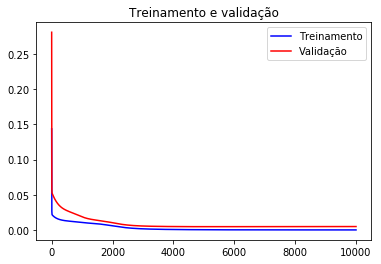


 Erro Quadrático =  0.004998 

 
 
 Deseja treinar mais configuração (s/n)? n


In [8]:
(neuro)=treinar(ent, ent_val, sai, sai_val)

# Quarto Passo: Treinar a rede neural com a melhor configuração

Entre com quantidade de neurônios (Por exemplo, 2): 5
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 10000


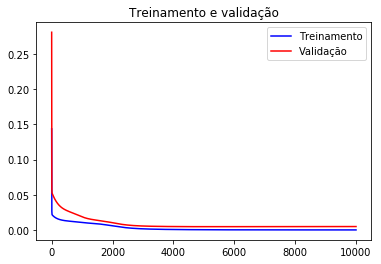


 Erro Quadrático =  0.004998 


In [9]:
(neuro)=treina_melhor(ent, ent_val, sai, sai_val)

# Quarto passo: Avaliação

## Carrega planilha Excel contendo os dados a serem avaliados

In [10]:
excel_f1 = r'avalia.xlsx'

avalia = pd.read_excel(excel_f1)

avalia

,area,no quartos,no suites,vagas garagem,condominio,iptu,piscina,area lazer,varanda,varanda gourmet,churrasqueira,salao de festas,frente,avenida,Valor
0,93,2,0,1,550,800,0,0,0,0,0,0,0,0,550000
1,155,3,1,1,1330,1800,0,0,0,0,0,0,0,1,980000


In [11]:
en_aval = avalia.columns[range(0, avalia.shape[1],1)]
saida_real=pd.DataFrame(avalia,columns=[en_aval[avalia.shape[1]-1]])
avalia=normalizar_ativa (avalia,minimo,maximo)
(ent_avalia, sai_avalia)=formatar_ativa(avalia)

In [12]:
y2=ativa (avalia, ent_avalia, sai_avalia, neuro,minimo, maximo)


In [13]:
en1 = avalia.columns[avalia.shape[1]-1]
saida_avalia=pd.DataFrame(avalia,columns=[en1])

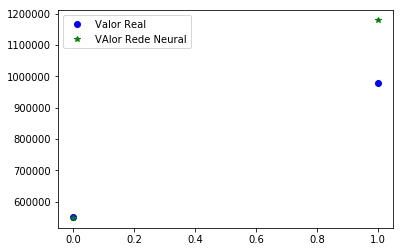


 Valor ofertado = 
 550000
980000 

 Estimação da Rede Neural Artificial = 
 548325.0
1179075.0 


In [14]:
apresenta (y2,saida_real)